In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd

In [2]:
mnist = tf.keras.datasets.mnist

In [6]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

5


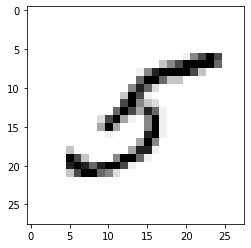

In [7]:
import matplotlib.pyplot as plt

image_index = 35
print(y_train[image_index])
plt.imshow(x_train[image_index], cmap='Greys')
plt.show()

In [8]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99):
      print("\nReached 99% accuracy so cancelling training")
      self.model.stop_training = True

In [9]:
callbacks = myCallback()

In [10]:
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(28, 28)),
                             tf.keras.layers.Dense(512, activation=tf.nn.relu),
                             tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [13]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2011 - accuracy: 0.9403
Epoch 2/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0795 - accuracy: 0.9753
Epoch 3/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0509 - accuracy: 0.9842
Epoch 4/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0368 - accuracy: 0.9884
Epoch 5/10
1870/1875 [============================>.] - ETA: 0s - loss: 0.0257 - accuracy: 0.9917
Reached 99% accuracy so cancelling training
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0257 - accuracy: 0.9916


In [15]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.07432671636343002
Test accuracy: 0.9772999882698059


In [27]:
test_data = pd.read_csv('/content/drive/My Drive/Kaggle/Digit Recognizer/test.csv')

In [57]:
test_data['pixel0']

0        0
1        0
2        0
3        0
4        0
        ..
27995    0
27996    0
27997    0
27998    0
27999    0
Name: pixel0, Length: 28000, dtype: int64

In [42]:
print(test_data.shape) 

(28000, 784)


In [29]:
label = model.predict(test_data)

In [35]:
print(label.shape)

(28000, 10)


In [31]:
label = np.squeeze(label)

In [32]:
print(label)

[[0. 0. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]]


In [44]:
print(label[0:5])

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [49]:
i = tf.argmax(label, axis=1)

In [52]:
i

<tf.Tensor: shape=(28000,), dtype=int64, numpy=array([2, 0, 9, ..., 3, 9, 2])>

In [58]:
Submission = pd.DataFrame({ 'Label': i })
Submission.to_csv('digit_submission1.csv', index=True)